<a href="https://colab.research.google.com/github/KCLaurelie/NN-course/blob/master/Neural_Networks_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import sklearn.metrics

**Neurons are the basic building blocks of Neural Networks**

Usually a neural network has thousands or millions of neurons, but let's for now work with a network that has only one.

<img src="https://drive.google.com/uc?export=view&id=1ZTKIeLniLfuTuaCIlP9vvP_glTnURoP1" height='250px' />

$
x_1 - \text{Input} \\
ŷ_1 - \text{Output} \\
$

$
z_1 = w_1 \cdot x_1 + b_1 \\
w_1 - \text{Weight for the first input} \\
b_1 - \text{Bias term for this neuron} \\
z_1 - \text{The linear combination of the inputs and the weights + a bias} \\
$

$
\theta = \{w, b\} \\
\theta - \text{Parameters of the model/network} \\
$

$
ŷ_1 = f(z_1) \\
f - \text{The activation function} \\
$



**Activation functions**

Linear:

$f(z) = z$

---
Step:

$f(z) = \begin{cases}
    1,& \text{if } x > 0\\
    0,              & x \le 0
\end{cases}$

---
Sigmoid:

$f(z) = \frac{1}{1 + e^{-z}}$

---
tanh:

$f(z) = tanh(z) = \frac{1 - e^{-x}}{1 + e^{-x}}$

---
ReLU:

$f(z) = max(0, z)$



In [0]:
def step(z):
  # Show an example for indexing (how to access number > X)
  return np.array(z > 0, dtype=np.int32)

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def tanh(z):
  return np.tanh(z)

def relu(z):
  return np.maximum(0, z)

In [0]:
def plot(z, yh):
  plt.grid(True)
  plt.xlabel('z')
  plt.ylabel('ŷ')
  plt.plot(z, yh, label='Linear', color='b')
  plt.axhline(0, color='orange')
  plt.axvline(0, color='orange')
  plt.legend()
  plt.show()

[-10.         -9.7979798  -9.5959596] [ 9.5959596  9.7979798 10.       ]

[0 0 0] [1 1 1]


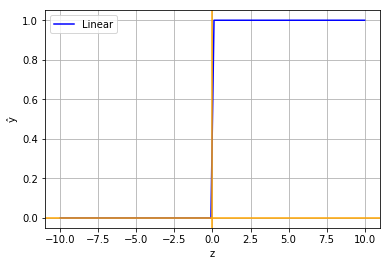

In [0]:
z = np.linspace(-10, 10, 100)

yh = step(z)
print(z[0:3], z[-3:])
print()
print(yh[0:3], yh[-3:])
plot(z, yh)

[-10.         -9.7979798  -9.5959596] [ 9.5959596  9.7979798 10.       ]

[0. 0. 0.] [ 9.5959596  9.7979798 10.       ]


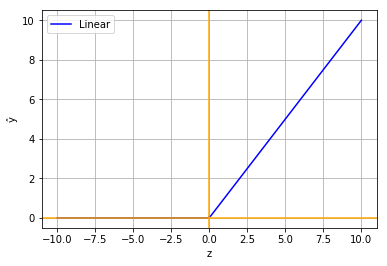

In [0]:
yh = relu(z)
print(z[0:3], z[-3:])
print()
print(yh[0:3], yh[-3:])
plot(z, yh)

[-10.         -9.7979798  -9.5959596] [ 9.5959596  9.7979798 10.       ]

[4.53978687e-05 5.55606489e-05 6.79983174e-05] [0.999932   0.99994444 0.9999546 ]


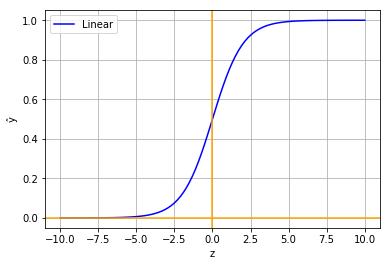

In [0]:
yh = sigmoid(z)
print(z[0:3], z[-3:])
print()
print(yh[0:3], yh[-3:])
plot(z, yh)

**An example of an oversimplified problem that can be solved using NN**

Our input is outside temperature which is a value between -30 and 40. We want our NN to predict is it hot or cold outside. This is an example of supervised ML using NN.

Let's encode the output values as:

$
hot   -  1 \\
cold - 0
$

---

$
D = \{\\
(-4, 0), \\
(1, 0),\\
(25, 1),\\
...\}
$

---

In [0]:
# Let's generate a dataset
x = np.random.randint(-30, 40, 100)
y = np.array([1 if v > 20 else 0 for v in x])
for i in range(10):
  print("If the temperature is {:4} it is  {}".format(x[i], "hot" if y[i] == 1 else "cold"))

If the temperature is   34 it is  hot
If the temperature is   15 it is  cold
If the temperature is   21 it is  hot
If the temperature is   -3 it is  cold
If the temperature is   28 it is  hot
If the temperature is   11 it is  cold
If the temperature is  -10 it is  cold
If the temperature is   25 it is  hot
If the temperature is   39 it is  hot
If the temperature is  -23 it is  cold


<img src="https://drive.google.com/uc?export=view&id=1ZTKIeLniLfuTuaCIlP9vvP_glTnURoP1" height='250px' />

The first thing we need to do is initialize the parameters of our NN. In our case we only have two parameters $w_1$ and $b_1$. Usually a random valaue between -1 and 1 is assigned to both. 

In [0]:
# Initialize the parameters
w1 = np.random.uniform(-1, 1)
b1 = np.random.uniform(-1, 1)
print(w1, b1)

-0.8818675331990031 -0.8219881535090334


$
z_1 = w_1 \cdot x_1 + b_1 \\
ŷ_1 = f(z_1) \\
$

Let's choose the sigmoid activation function.

In [0]:
# Forward pass - get the predictions
z1 = w1*x + b1
yh = sigmoid(z1)
print(z1[0:10])
print()
print(yh[0:10])

[-30.80548428 -14.05000115 -19.34120635   1.82361445 -25.51427908
 -10.52253102   7.99668718 -22.86867648 -35.21482195  19.46096511]

[4.18165466e-14 7.90973048e-07 3.98309630e-09 8.60999267e-01
 8.30403908e-12 2.69222375e-05 9.99663537e-01 1.17019973e-10
 5.08624349e-16 9.99999996e-01]


In [0]:
# Encode the outputs hot/cold
yh_temp = []
for val in yh:
  if val > 0.5:
    yh_temp.append("hot")
  else:
    yh_temp.append("cold")

In [0]:
# Print the first 10 g.t. and predictions
for i in range(10):
  print("If the temperature is {:4} it is  {:4}  vs predicted  {}".format(x[i], "hot" if y[i] == 1 else "cold", yh_temp[i]))

If the temperature is   34 it is  hot   vs predicted  cold
If the temperature is   15 it is  cold  vs predicted  cold
If the temperature is   21 it is  hot   vs predicted  cold
If the temperature is   -3 it is  cold  vs predicted  hot
If the temperature is   28 it is  hot   vs predicted  cold
If the temperature is   11 it is  cold  vs predicted  cold
If the temperature is  -10 it is  cold  vs predicted  hot
If the temperature is   25 it is  hot   vs predicted  cold
If the temperature is   39 it is  hot   vs predicted  cold
If the temperature is  -23 it is  cold  vs predicted  hot


**Cost function / Loss function / Error function**

Cross entropy loss is defined as:

$
L = -\frac{1}{N}\sum_i y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i) \\
N - \text{Number of examples in our training set} \\
y_i - \text{The ground truth} \\
\hat{y}_i - \text{The predicted value}\\
$

---
$
y = 1 = hot \\
yh = 0.3 = cold \\
L = -1 \cdot log(0.3) + (1 - 1)log(1-0.3) = -log(0.3) = 1.2 \\
$

$
y = 1 = hot \\
yh = 0.9 = hot \\
L = -1 \cdot log(0.9) + (1 - 1)log(1-0.9) = -log(0.9) = 0.1 \\
$

$
y = 1 = hot \\
yh = 0.01 = cold \\
L = -1 \cdot log(0.01) + (1 - 1)log(1-0.01) = -log(0.01) = 4.6
$

In [0]:
# Calculate the loss
loss = sklearn.metrics.log_loss(y, yh)
print(loss)

12.38615153356781


**The training procedure**

Once we have a loss function and we know how wrong we are, we can update the parameters of our model, so that next time it predicts correctly. 

1. Prepare the dataset - Split the dataset into train/test

2. Build the Network

3. Initialize the parameters

4. Forward pass - have the network predict the outputs for the train set

5. Error calculation - the difference between predicted and real outputs

6. Backward pass - Update network parameters so that it does not make the same mistakes again 

7. Repeat the steps 4,5,6 until you are happy

8. Once training is done run the network on a test set - this is your accuracy




This time we will not cover derivations, gradients, GD, convex functions... This will be next session. 

# **How to do this in pytorch**

In [0]:
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 1)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      return x

net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
inputs = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)
labels = torch.tensor(y.reshape(-1, 1), dtype=torch.float)
net.train()
for epoch in range(200):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(inputs)
  # Calculate error
  loss = criterion(outputs, labels)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()

  # print statistics
  if epoch % 20 == 19:    # print every 2000 mini-batches
      print(loss.item())

print('Finished Training')

0.6022794246673584
0.5591546893119812
0.5392382740974426
0.5212439894676208
0.504747211933136
0.4894274175167084
0.4751621186733246
0.46186569333076477
0.4494578242301941
0.4378659725189209
Finished Training
